In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_339524e45d8c4ca5b34d613d0c24c364 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='nyc_311_dataset_V7.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'nyc_311_dataset_V7.csv'
}

In [3]:
body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='nyc_311_merged_dataset_V7.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)

In [4]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'nyc_311_merged_dataset_V7.csv'
}

In [5]:
body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='nyc_311_dataset_allb_V7.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfa = pd.read_csv(body)

In [6]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'nyc_311_dataset_allb_V7.csv'
}

In [7]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (19.0.3)


In [8]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, jaccard_similarity_score
from sklearn import metrics

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Question 4: 
### Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

Not all columns from NYC 311 dataset are included.
This dataset has also been filtered with:
 - The complaint type that we are going to analyze defined as HEAT/HOT WATER
 - The BRONX borough which has the most HEAT/HOT WATER complaints

In [9]:
df.head()

,borough,complaint_type,created_date,incident_address,unique_key,incident_zip
0,BRONX,HEAT/HOT WATER,2015-11-06 07:06:37,1505 TOWNSEND AVENUE,31930038,10452
1,BRONX,HEAT/HOT WATER,2015-11-06 06:43:48,1390 PROSPECT AVENUE,31930075,10459
2,BRONX,HEAT/HOT WATER,2015-11-07 20:23:56,2995 BOTANICAL SQUARE,31930602,10458
3,BRONX,HEAT/HOT WATER,2015-11-07 16:26:04,2351 GRAND CONCOURSE,31930609,10468
4,BRONX,HEAT/HOT WATER,2015-11-07 07:55:25,750 GRAND CONCOURSE,31930628,10451


In [10]:
#We can check some information about this first dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532325 entries, 0 to 532324
Data columns (total 6 columns):
borough             532325 non-null object
complaint_type      532325 non-null object
created_date        532325 non-null object
incident_address    532325 non-null object
unique_key          532325 non-null int64
incident_zip        532325 non-null int64
dtypes: int64(2), object(4)
memory usage: 24.4+ MB


We can have a look on yearly changes of the HEAT/HOT WATER complaints occurence.

In [11]:
df["created_date"].head()

0    2015-11-06 07:06:37
1    2015-11-06 06:43:48
2    2015-11-07 20:23:56
3    2015-11-07 16:26:04
4    2015-11-07 07:55:25
Name: created_date, dtype: object

In [12]:
#We convert the column 'created_date" into datetime
df['created_date'] = pd.to_datetime(df['created_date'])

In [13]:
grp = df.groupby(df.created_date.dt.year)

In [14]:
grp.count()

,borough,complaint_type,created_date,incident_address,unique_key,incident_zip
created_date,,,,,,
2010,32,32,32,32,32,32
2011,35740,35740,35740,35740,35740,35740
2012,56617,56617,56617,56617,56617,56617
2013,63873,63873,63873,63873,63873,63873
2014,79844,79844,79844,79844,79844,79844
2015,71864,71864,71864,71864,71864,71864
2016,74197,74197,74197,74197,74197,74197
2017,68713,68713,68713,68713,68713,68713
2018,69616,69616,69616,69616,69616,69616


In [15]:
grp.count().index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='created_date')

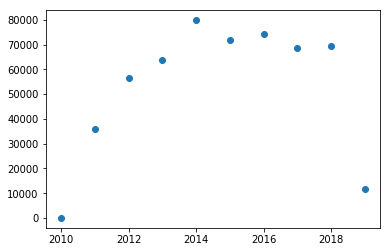

In [16]:
plt.scatter(grp.count().index ,grp.count().complaint_type)
plt.show()

We should ignore 2010 and 2019 data because they are partial (not for all year).

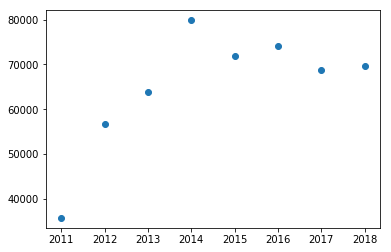

In [17]:
plt.scatter(grp.count().index[1:-1] ,grp.count().complaint_type[1:-1])
plt.show()

Let's build a non-linear regression for predicting future occurences.

This is an additional guess with only using the 311 dataset.

In [18]:
#Let's define X and y
X = grp.count().index[1:-1]
y = grp.count().complaint_type[1:-1]

In [19]:
X = [X.tolist()]
X

[[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

In [20]:
X = np.asarray(X)

In [21]:
X = X.reshape(-1, 1)

In [22]:
lin = LinearRegression()

In [23]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
 
lin.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

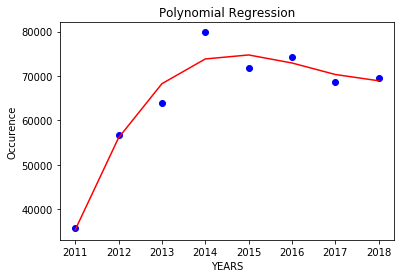

In [24]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('YEARS') 
plt.ylabel('Occurence') 
  
plt.show()

In [25]:
#let's predict the 2019 value
lin.predict(poly.fit_transform([[2019]]))

array([ 70624.21386719])

We can expect that the number of complaints for HEAT/HOT WATER in Bronx for 2019 will be close to 70000.

# BUIILDING A PREDICTIVE MODEL

Analysis based on yearly values is simple but can be useful. 

Now let's dive into a more detailled analysis.

In [26]:
#Not all columns from NYC 311 dataset are included.
df2.head()

,Address,NumFloors,ResArea,YearBuilt,BuiltFAR,BldgDepth,HEAT/HOT WATER,ComplaintCount
0,126 BRUCKNER BOULEVARD,1.0,0,1931,0.05,16.0,False,0.0
1,138 BRUCKNER BOULEVARD,2.0,0,1931,1.13,200.0,False,0.0
2,144 BRUCKNER BOULEVARD,5.0,12500,1931,5.00,85.0,True,2.0
3,148 BRUCKNER BOULEVARD,5.0,6876,1920,4.58,70.0,True,13.0
4,519 EAST 132 STREET,1.0,0,1931,0.61,100.0,False,0.0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83143 entries, 0 to 83142
Data columns (total 8 columns):
Address           83143 non-null object
NumFloors         83143 non-null float64
ResArea           83143 non-null int64
YearBuilt         83143 non-null int64
BuiltFAR          83143 non-null float64
BldgDepth         83143 non-null float64
HEAT/HOT WATER    83143 non-null bool
ComplaintCount    83143 non-null float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 4.5+ MB


In [28]:
df2.shape

(83143, 8)

Notes on dataset "df2" (nyc_311_merged_dataset_V7.csv)

1. This dataset is merged dataset of 311 Data and PLUTO data for BRONX
2. Merging process has been done based on Address
3. There is only HEAT/HOT WATER complaints.
4. ComplaintCount column shows how many complaints has occured
5. HOT/HEAT WATER column if there is HEAT/HOT WATER problem occured in that Address or not.

## Important Notes:

I found in question 3 of this project that the following features are the most related with this complaint amount.
1. NumFloors
2. ResArea
3. BuiltFar
4. BldgAge (2019 - YearBuilt)
5. BldgDepth

I will make a model based on those 5 features.

In the question, it asked us to make a model predicting the amount. So we should use regression algorithm. I choose to build a Regression Decision Tree. Also, I can use Classification Decision Tree if I want to find if the problem will occur or not. There is a column in my dataset (HEAT/HOT WATER) which contains True/False for this. This will be done in additional insights.

In [29]:
df2["BldgAge"] = 2019 - df2["YearBuilt"]

In [30]:
df2.drop("YearBuilt", axis = 1, inplace = True)
df2.drop("Address", axis = 1, inplace = True)
df2 = df2[['NumFloors','ResArea','BuiltFAR','BldgDepth','BldgAge','ComplaintCount','HEAT/HOT WATER']]

In [31]:
df2.head()

,NumFloors,ResArea,BuiltFAR,BldgDepth,BldgAge,ComplaintCount,HEAT/HOT WATER
0,1.0,0,0.05,16.0,88,0.0,False
1,2.0,0,1.13,200.0,88,0.0,False
2,5.0,12500,5.00,85.0,88,2.0,True
3,5.0,6876,4.58,70.0,99,13.0,True
4,1.0,0,0.61,100.0,88,0.0,False


In [32]:
#Let's look if there is any NaN variables
df2.isnull().sum()

NumFloors         0
ResArea           0
BuiltFAR          0
BldgDepth         0
BldgAge           0
ComplaintCount    0
HEAT/HOT WATER    0
dtype: int64

ComplaintCount is a continuous variable describing how many calls have been received from same address. Let's look at NumFloors definition from the PLUTO document: "In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor.". So, basically, how many floors that this address has.

In [33]:
#Check the values of NumFloors
df2["NumFloors"].unique()

array([  1.  ,   2.  ,   5.  ,   3.  ,   4.  ,   7.  ,  16.  ,   6.  ,
        17.  ,  20.  ,  12.  ,   0.  ,   8.  ,   1.5 ,  13.  ,  19.  ,
        22.  ,  11.  ,  14.  ,   9.  ,   1.75,  10.  ,  25.  ,  18.  ,
         2.5 ,   3.5 ,  21.  ,   2.75,  23.  ,  29.  ,  15.  ,   5.5 ,
         2.67,   3.75,   1.67,  44.  ,  30.  ,  31.  ,   2.25,  42.  ,
        28.  ,   0.5 ,   1.25,  24.  ,  33.  ,   1.33,   4.5 ])

In the dataset file, there is an explanation: "If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot. If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot." Based on this, I decided to drop zeros from the dataset

In [34]:
df2 = df2[df2.NumFloors != 0]
df2.head()

,NumFloors,ResArea,BuiltFAR,BldgDepth,BldgAge,ComplaintCount,HEAT/HOT WATER
0,1.0,0,0.05,16.0,88,0.0,False
1,2.0,0,1.13,200.0,88,0.0,False
2,5.0,12500,5.00,85.0,88,2.0,True
3,5.0,6876,4.58,70.0,99,13.0,True
4,1.0,0,0.61,100.0,88,0.0,False


Also: "A RESIDENTIAL FLOOR AREA of zero can mean it is either not available or not applicable." 
Let's drop zeros from residental Area.

In [35]:
df2 = df2[df2.ResArea != 0]

Let's make a database which only contains the features that we've selected.

In [36]:
df3 = df2[["NumFloors", "ResArea", "BuiltFAR", "BldgDepth", "BldgAge", "ComplaintCount"]]

In [37]:
df3.head()

,NumFloors,ResArea,BuiltFAR,BldgDepth,BldgAge,ComplaintCount
2,5.0,12500,5.00,85.0,88,2.0
3,5.0,6876,4.58,70.0,99,13.0
16,4.0,6784,2.71,75.0,99,0.0
19,5.0,9176,4.60,96.0,94,92.0
25,16.0,1306230,6.39,48.0,63,0.0


We can now make train and test splits.

In [38]:
features = df3.columns.tolist()
response = 'ComplaintCount'
features.remove(response)

X = df3[features]
y = df3[response]

In [39]:
#80% train, 20% test size
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Now we apply regression decision tree.

In [40]:
regressor = DecisionTreeRegressor(random_state = 32)

In [41]:
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=32, splitter='best')

Now let's have a look on some predictions.

In [42]:
#from test data, result should be 2.
regressor.predict([[5.0, 12500, 5, 85, 88]])

array([ 2.])

In [43]:
#from test data, result should be 92.
regressor.predict([[5.0, 9176, 4.60, 96.0, 94]])

array([ 92.])

In [44]:
# from test data, result should be 17
regressor.predict([[5.00,21500,4.30,99,86.0]])

array([ 11.])

In [45]:
#from test data, result should be 69
regressor.predict([[6.00,70900,3.27,93,58.83]])

array([ 88.])

In [46]:
#from test data, result should be 24
regressor.predict([[2.00,2100,0.88,99,50.00]])

array([ 0.])

In [47]:
#from test data, result should be 0
regressor.predict([[16.0,1306230,6.39,48.0,63]])

array([ 0.])

# Concluding Remarks
### A predictive model for future prediction of the possibility of complaints of the specific type that I identified in response to Question 1 can be built using Regression Decision Tree.

We can now plot some graphs using this model.

In [48]:
predTree = regressor.predict(X_test)

In [49]:
print (predTree [0:5])

[ 0.  0.  0.  0.  0.]


In [50]:
print (y_test [0:5])

38413    0.0
60152    0.0
21762    0.0
39288    0.0
51034    0.0
Name: ComplaintCount, dtype: float64


In [51]:
x_grid = np.arange(0, len(predTree), 1)

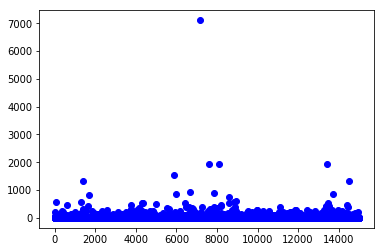

In [52]:
plt.scatter(x_grid, predTree, color = "blue")

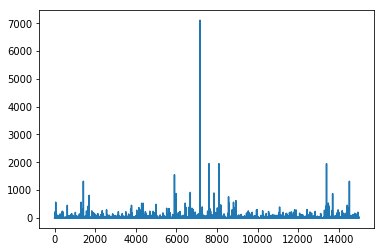

In [53]:
plt.plot(x_grid, regressor.predict(X_test))

In [54]:
y_grid = np.arange(len(y_test), 1)

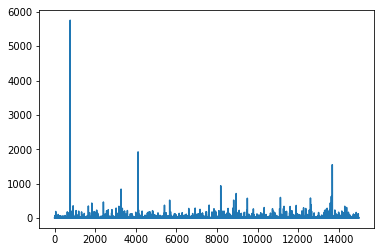

In [55]:
plt.plot(x_grid, y_test)

We can also compare predictions and actual values.

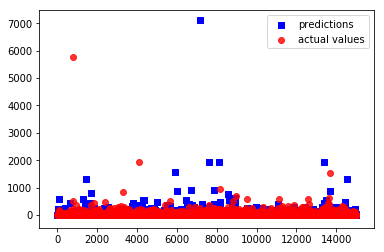

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_grid, predTree, c='b', marker="s", label='predictions')
ax1.scatter(x_grid, y_test, c='r', marker="o", alpha=0.8, label='actual values')
plt.legend(loc='upper right');
plt.show()

# Additional Insights
### I can use Classification if I want to find if the problem will occur or not depending of characteristics of one house.

In [57]:
df2.drop("ComplaintCount", axis = 1, inplace = True)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74982 entries, 2 to 83139
Data columns (total 6 columns):
NumFloors         74982 non-null float64
ResArea           74982 non-null int64
BuiltFAR          74982 non-null float64
BldgDepth         74982 non-null float64
BldgAge           74982 non-null int64
HEAT/HOT WATER    74982 non-null bool
dtypes: bool(1), float64(3), int64(2)
memory usage: 6.0 MB


In [59]:
df2.head()

,NumFloors,ResArea,BuiltFAR,BldgDepth,BldgAge,HEAT/HOT WATER
2,5.0,12500,5.00,85.0,88,True
3,5.0,6876,4.58,70.0,99,True
16,4.0,6784,2.71,75.0,99,False
19,5.0,9176,4.60,96.0,94,True
25,16.0,1306230,6.39,48.0,63,False


In [60]:
X = df2.drop('HEAT/HOT WATER',axis=1)
y = df2['HEAT/HOT WATER']

### Normalize Data

In [61]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [63]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (59985, 5) (59985,)
Test set: (14997, 5) (14997,)


## Classification Decision Trees

In [64]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
predTree = Tree.predict(X_test)

In [67]:
print (predTree [0:5])
print (y_test [0:5])

[ True False False False  True]
2380     False
23804    False
48698     True
70016    False
2308     False
Name: HEAT/HOT WATER, dtype: bool


In [68]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.850103354004


The accuracy of 85% is quite good.

## We can also use SVM for classification.

In [69]:
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
yhat = clf.predict(X_test)
yhat [0:5]

array([False, False, False, False,  True], dtype=bool)

[[ 1211  2005]
 [  240 11541]]
             precision    recall  f1-score   support

      False       0.85      0.98      0.91     11781
       True       0.83      0.38      0.52      3216

avg / total       0.85      0.85      0.83     14997

Confusion matrix, without normalization
[[11541   240]
 [ 2005  1211]]


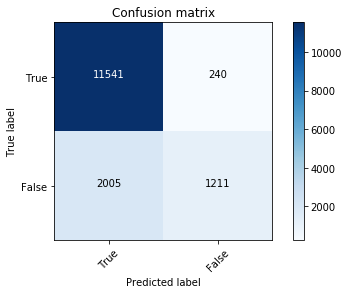

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True','False'],normalize= False,  title='Confusion matrix')

In [72]:
f1_score(y_test, yhat, average='weighted') 

0.82721278253704855

In [73]:
jaccard_similarity_score(y_test, yhat)

0.85030339401213573

Both Jaccard index and F1-score are close to 1.

### These two classifiers with ~85% accuracy are doing a quite good model for T/F with the characteriscs of an address.

# Additional Insight : predicting NYC total complaints of the type HEAT/HOT WATER for 2019.

Not all columns from NYC 311 dataset are included.
This dataset has also been filtered with:
 - The complaint type that we are going to analyze defined as HEAT/HOT WATER
 - This dataset contains all boroughs of NYC

In [74]:
dfa.head()

,borough,complaint_type,created_date,incident_address,unique_key,incident_zip
0,BRONX,HEAT/HOT WATER,2015-11-06 07:06:37,1505 TOWNSEND AVENUE,31930038,10452
1,BRONX,HEAT/HOT WATER,2015-11-06 06:43:48,1390 PROSPECT AVENUE,31930075,10459
2,BROOKLYN,HEAT/HOT WATER,2015-11-07 15:41:28,435 GRAND AVENUE,31930540,11238
3,STATEN ISLAND,HEAT/HOT WATER,2015-11-06 17:57:24,85 HOLLAND AVENUE,31930548,10303
4,BROOKLYN,HEAT/HOT WATER,2015-11-06 11:46:20,273 LEE AVENUE,31930549,11206


In [75]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914704 entries, 0 to 1914703
Data columns (total 6 columns):
borough             object
complaint_type      object
created_date        object
incident_address    object
unique_key          int64
incident_zip        int64
dtypes: int64(2), object(4)
memory usage: 87.6+ MB


I will be using the same procedure as for the first part of this file.

In [76]:
dfa['created_date'] = pd.to_datetime(dfa['created_date'])

In [77]:
grpa = dfa.groupby(dfa.created_date.dt.year)

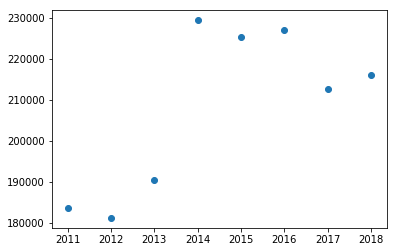

In [78]:
plt.scatter(grpa.count().index[1:-1] ,grpa.count().complaint_type[1:-1])
plt.show()

In [79]:
X = grpa.count().index[1:-1]
y = grpa.count().complaint_type[1:-1]

In [80]:
X = [X.tolist()]

In [81]:
X = np.asarray(X)

In [82]:
X = X.reshape(-1, 1)

In [83]:
lin = LinearRegression()

In [84]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
 
lin.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

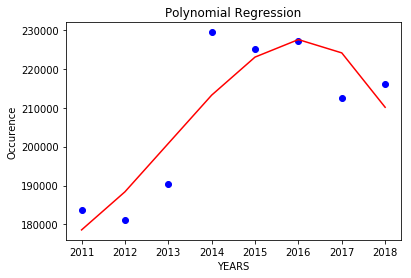

In [85]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('YEARS') 
plt.ylabel('Occurence') 
  
plt.show()

In [86]:
#let's predict the 2019 value
lin.predict(poly.fit_transform([[2019]]))

array([ 182942.54])

# Additionnal Insight Concluding Remark
### With non-linear regression, we can expect the number of complaints in NYC for 2019 to be close to 183000.